# Colloid+polymer mixture phase diagram

Implementation of the generalised free volume theory

    Fleer, G. J., & Tuinier, R. (2008). Analytical phase diagrams for colloids and non-adsorbing polymer. Advances in Colloid and Interface Science, 143(1-2), 1–47. doi:10.1016/j.cis.2008.07.001

In [1]:
from matplotlib.pyplot import *
%matplotlib inline
from colloid_polymer_phase_diagram import phase

We use the `colloid_polymer_phase_diagram.phase` module, where the main object represents an equation of state of the colloids. Here we will use the standard Carnahan and Starling equation of state for the hard sphere fluid and the Hall equation of state for the hard sphere crystal. These objects are almost free to construct so we will call the constructor explicitely every time.

To take the polymers into account, one need to know the size ratio $q_R = 2R_g/\sigma_C$ where $\sigma_C$ is the diameter of the colloids and $R_g$ is the radius of gyration of the polymers.

Calculations are done in a parameter space $(f, \Pi v)$ convinient for the theory and then converted to the experimental parameter space $(\phi, C_p)$. 

## The fluid-solid coexistence

First, we compute the fluid-solid coexistence for $q_R=0.1$ in the $(f, \Pi v)$ space. For each $\Pi v$ between 0 and `maxpiv` we finding the $f_F$ and $f_S$ that satisfy the equality of the chemical potentials and of the pressures.

(0.0, 1000.0)

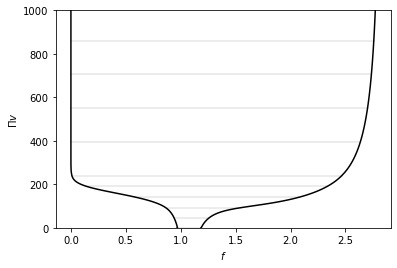

In [2]:
qR = 0.10
q = phase.qR2q(qR) 
FS = phase.all_coexistence(q, phase.CarnahanStarling(), phase.Hall(), maxpiv=1000)
#tie lines
for piv, fF, fS in FS[::10]:
    plot([fF, fS], [piv]*2, color=[0.9]*3)
#coexistence lines
for f in FS.T[1:]:
    plot(f, FS[:,0], color='k')
xlabel(r'$f$')
ylabel(r'$\Pi v$')
ylim(0,1000)

We can then convert $f$ to a more readily understandable volume fraction $\phi$.

(0.0, 1000.0)

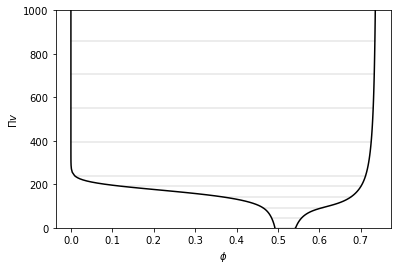

In [3]:
#tie lines
for piv, fF, fS in FS[::10]:
    plot([phase.f2vf(fF), phase.f2vf(fS)], [piv]*2, color=[0.9]*3)
#coexistence lines
for f in FS.T[1:]:
    plot(phase.f2vf(f), FS[:,0], color='k')
xlabel(r'$\phi$')
ylabel(r'$\Pi v$')
ylim(0,1000)

The conversion from $\Pi v$ to polymer concentration $C_P$ is not that straightforward since we also need the value of $f$. And we only obtain the $C_P/C_P^*$ where $C_P^*$ is the polymer concentration at overlap.

Note that due to the dependence on $f$, the tie lines now have a slope.

(0.0, 0.75)

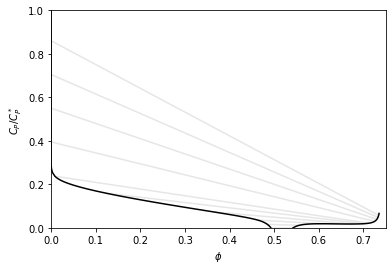

In [4]:
#tie lines
for piv, fF, fS in FS[::10]:
    plot(
        [phase.f2vf(fF), phase.f2vf(fS)], 
        [phase.piv2y(piv, qR) * phase.alpha(fF, q), phase.piv2y(piv, qR) * phase.alpha(fS, q)], 
        color=[0.9]*3
        )
#coexistence lines
for f in FS.T[1:]:
    plot(phase.f2vf(f), phase.piv2y(FS[:,0], qR) * phase.alpha(f, q), color='k')
xlabel(r'$\phi$')
ylabel(r'$C_P/C_P^*$')
ylim(0,1)
xlim(0,0.75)

Of course, this can be done for different size ratios, but we have to be careful about the value of `maxpiv`. If too small, the algorithm may not converge.

Text(0, 0.5, '$C_P/C_P^*$')

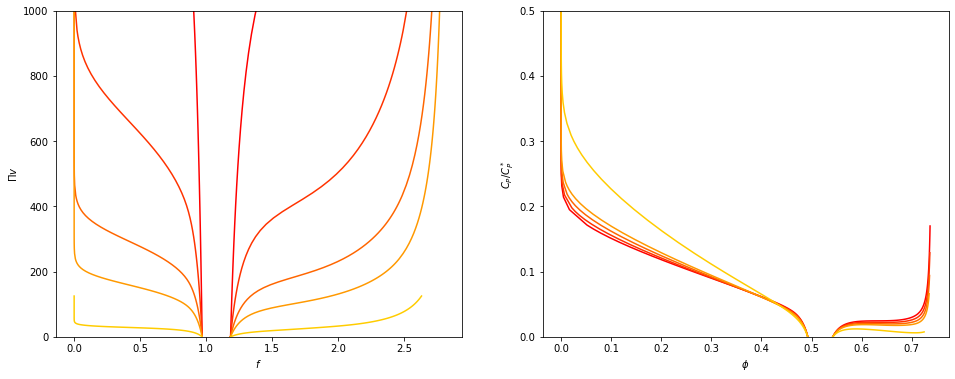

In [5]:
fig, axs = subplots(1,2, figsize=(16,6))
for i,qR in enumerate([0.04,0.06,0.08, 0.1,0.2]):
    q = phase.qR2q(qR) 
    FS = phase.all_coexistence(q, phase.CarnahanStarling(), phase.Hall(), maxpiv=1./qR**3)
    #coexistence lines
    for f in FS.T[1:]:
        axs[0].plot(f, FS[:,0], color=cm.autumn(i/5.))
        axs[1].plot(phase.f2vf(f), phase.piv2y(FS[:,0], qR) * phase.alpha(f, q), color=cm.autumn(i/5.))
axs[0].set_ylim(0,1000)
axs[0].set_xlabel(r'$f$')
axs[0].set_ylabel(r'$\Pi v$')
axs[1].set_ylim(0,0.5)
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$C_P/C_P^*$')

## The gas-liquid coexistence

Given sufficient attraction between the particles, here osmotic pressure exerted by the polymers, a low density fluid (gas) can cohexist with a high density fluid (liquid). This time we explore intrinsic properties of the fluid equation of state, thus we will use only Carnahan and Starling.

We obtain the location of the critical point in the $(f, \Pi v)$ space and convert it as before.

In [6]:
qR = 0.15
q = phase.qR2q(qR)
fc, pivc = phase.CarnahanStarling().critical_point(q)
print(fc, pivc)
print(phase.f2vf(fc), phase.piv2y(pivc, qR) * phase.alpha(fc, q))

0.8927581097377829 75.77009625820261
0.4716704713321571 0.07565967536538865


For each $\Pi v$ between the critical pressure and `maxpiv` we find the $f_G$ and $f_L$ that satisfy the equality of the chemical potentials and of the pressures. We obtain also the location of the spinodal lines as respective location of minima and extrema of the free energy.

Text(0, 0.5, '$C_P/C_P^*$')

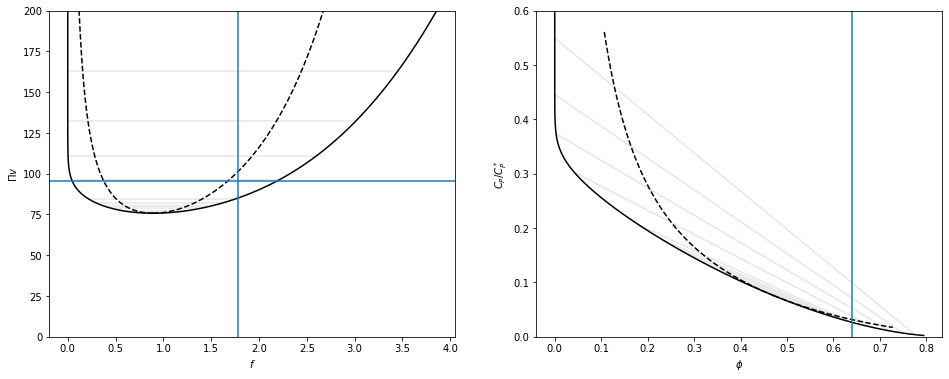

In [7]:
fig, axs = subplots(1,2, figsize=(16,6))
GL = phase.CarnahanStarling().all_GL(q, 200)
#tie lines
for piv, fG, fL in GL[::10,:3]:
    axs[0].plot([fG, fL], [piv]*2, color=[0.9]*3)
    axs[1].plot(
        [phase.f2vf(fG), phase.f2vf(fL)], 
        [phase.piv2y(piv, qR) * phase.alpha(fG, q), phase.piv2y(piv, qR) * phase.alpha(fL, q)], 
        color=[0.9]*3
        )
#binodal lines
for f in GL.T[1:3]:
    axs[0].plot(f, GL[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), color='k')
#spinodal lines
for f in GL.T[3:]:
    axs[0].plot(f, GL[:,0], 'k--')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), 'k--')

axs[0].set_ylim(0,200)
axs[0].axvline(phase.vf2f(0.64))
axs[0].axhline(pivc*(1+0.04/q))
axs[0].set_xlabel(r'$f$')
axs[0].set_ylabel(r'$\Pi v$')
axs[1].set_ylim(0,0.6)
axs[1].axvline(0.64)
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$C_P/C_P^*$')

Do not look too much at large volume fractions: the liquid branch of the binodal and the spinodal are going to volume fractions over close packing (vertical blue line)! This is obviously unphysical and show the limit of Carnahan and Starling equation of state that has no divergence at random close packing.

Liu equation of state is much better behaved. **Beware, long evaluation**

Text(0, 0.5, '$C_P/C_P^*$')

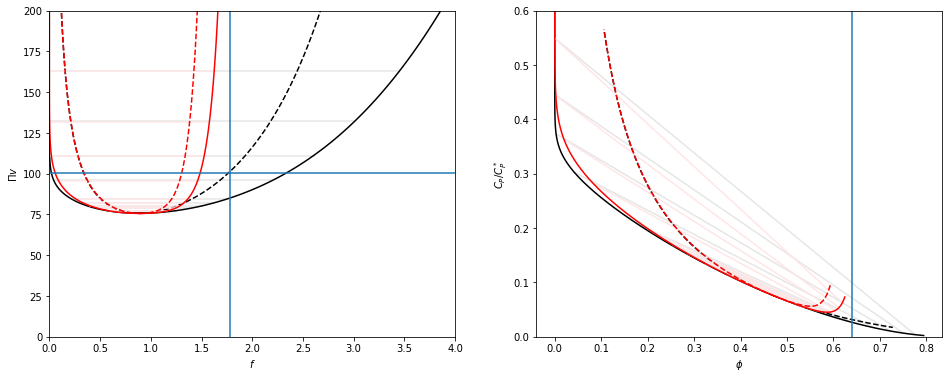

In [8]:
fig, axs = subplots(1,2, figsize=(16,6))
for c, eos in zip([np.zeros(3), np.array([1,0,0])], [phase.CarnahanStarling(), phase.Liu()]):
    GL = eos.all_GL(q, 200)
    #tie lines
    for piv, fG, fL in GL[::10,:3]:
        axs[0].plot([fG, fL], [piv]*2, color=np.maximum(c,0.9))
        axs[1].plot(
            [phase.f2vf(fG), phase.f2vf(fL)], 
            [phase.piv2y(piv, qR) * phase.alpha(fG, q), phase.piv2y(piv, qR) * phase.alpha(fL, q)], 
            color=np.maximum(c,0.9)
            )
    #binodal lines
    for f in GL.T[1:3]:
        axs[0].plot(f, GL[:,0], color=c)
        axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), color=c)
    #spinodal lines
    for f in GL.T[3:]:
        axs[0].plot(f, GL[:,0], color=c, ls='--')
        axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), color=c, ls='--')
axs[0].set_xlim(0,4)
axs[0].set_ylim(0,200)
axs[0].axvline(phase.vf2f(0.64))
axs[0].axhline(pivc*(1+0.05/q))
axs[0].set_xlabel(r'$f$')
axs[0].set_ylabel(r'$\Pi v$')
axs[1].set_ylim(0,0.6)
axs[1].axvline(0.64)
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$C_P/C_P^*$')

### Sensitivity of the spinodal to qR

Text(0, 0.5, '$C_P/C_P^*$')

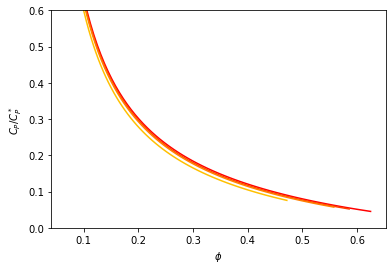

In [9]:
for i,qR in enumerate([0.071, 0.087, 0.1, 0.15]):
    q = phase.qR2q(qR)
    GL = phase.CarnahanStarling().all_GL(q, 1./qR**3)
    for f in GL.T[3:4]:
        plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), color=cm.autumn(i/4.))
ylim(0,0.6)
xlabel(r'$\phi$')
ylabel(r'$C_P/C_P^*$')

## Full phase diagram

Here we have two cases, depending on $q_R$. For small $q_R$, the critical point is over the fluid line, thus the gas-liquid coexistence is metastable to crystallisation.

Text(0, 0.5, '$C_P/C_P^*$')

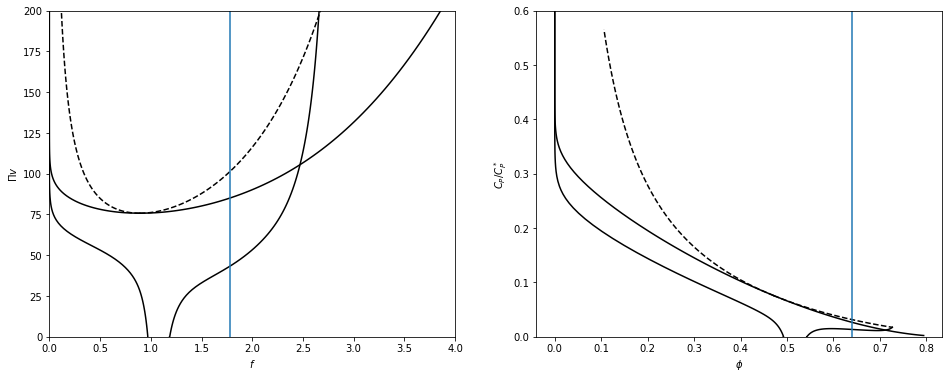

In [10]:
qR = 0.15
q = phase.qR2q(qR)
fig, axs = subplots(1,2, figsize=(16,6))
GL = phase.CarnahanStarling().all_GL(q, 200)
#binodal lines
for f in GL.T[1:3]:
    axs[0].plot(f, GL[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), color='k')
#spinodal lines
for f in GL.T[3:]:
    axs[0].plot(f, GL[:,0], 'k--')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), 'k--')
    
FS = phase.all_coexistence(q, phase.CarnahanStarling(), phase.Hall(), maxpiv=200)
#coexistence lines
for f in FS.T[1:]:
    axs[0].plot(f, FS[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(FS[:,0], qR) * phase.alpha(f, q), color='k')
    
axs[0].set_xlim(0,4)
axs[0].set_ylim(0,200)
axs[0].axvline(phase.vf2f(0.64))
axs[0].set_xlabel(r'$f$')
axs[0].set_ylabel(r'$\Pi v$')
axs[1].set_ylim(0,0.6)
axs[1].axvline(0.64)
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$C_P/C_P^*$')

Or, with Liu equartion of state

Text(0, 0.5, '$C_P/C_P^*$')

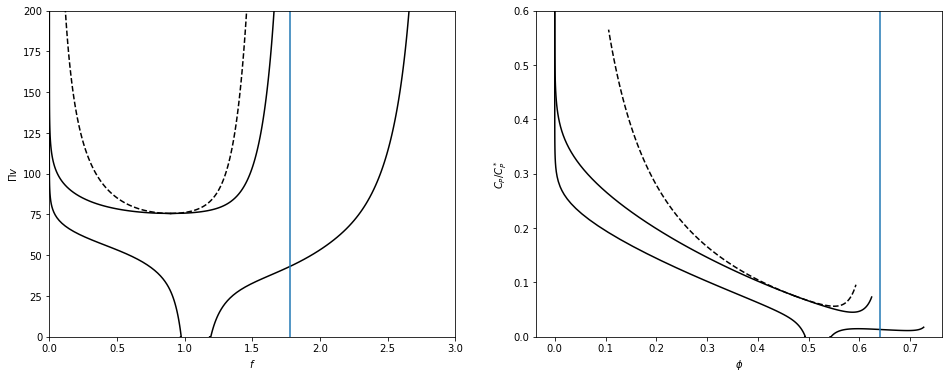

In [11]:
qR = 0.15
q = phase.qR2q(qR)
fig, axs = subplots(1,2, figsize=(16,6))
GL = phase.Liu().all_GL(q, 200)
#binodal lines
for f in GL.T[1:3]:
    axs[0].plot(f, GL[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), color='k')
#spinodal lines
for f in GL.T[3:]:
    axs[0].plot(f, GL[:,0], 'k--')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), 'k--')
    
FS = phase.all_coexistence(q, phase.Liu(), phase.Hall(), maxpiv=200)
#coexistence lines
for f in FS.T[1:]:
    axs[0].plot(f, FS[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(FS[:,0], qR) * phase.alpha(f, q), color='k')
    
axs[0].set_xlim(0,3)
axs[0].set_ylim(0,200)
axs[0].axvline(phase.vf2f(0.64))
axs[0].set_xlabel(r'$f$')
axs[0].set_ylabel(r'$\Pi v$')
axs[1].set_ylim(0,0.6)
axs[1].axvline(0.64)
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$C_P/C_P^*$')

For larger $q_R$ the critical point is below the fluid line, so we can have triple coexistence between gas, liquid and fluid

Text(0, 0.5, '$C_P/C_P^*$')

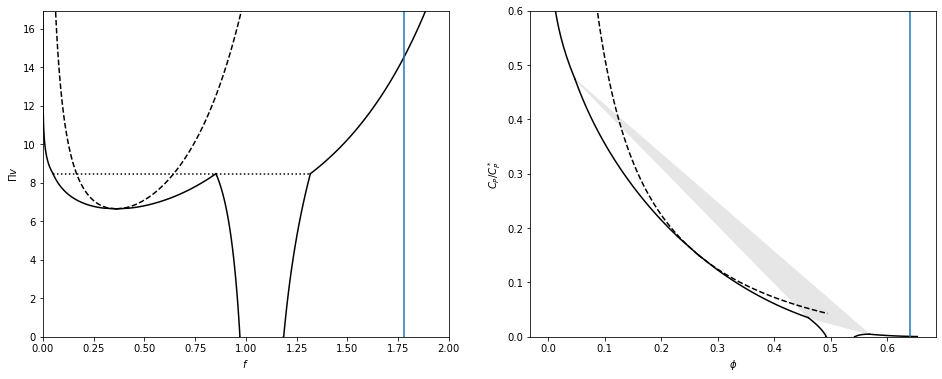

In [12]:
qR = 0.4
q = phase.qR2q(qR)
LS, GS, GL = phase.generate(q)
sppiv = np.unique(np.concatenate((GS[:,0], GL[:,0])))
spinodal = phase.CarnahanStarling().spinodalGL(q, sppiv)

fig, axs = subplots(1,2, figsize=(16,6))
#binodal lines
for f in GL.T[1:3]:
    axs[0].plot(f, GL[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), color='k')
#spinodal lines
for f in spinodal.T[1:]:
    axs[0].plot(f, sppiv, 'k--')
    axs[1].plot(phase.f2vf(f), phase.piv2y(sppiv, qR) * phase.alpha(f, q), 'k--')
    
#liquid-solid coexistence lines
for f in LS.T[1:]:
    axs[0].plot(f, LS[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(LS[:,0], qR) * phase.alpha(f, q), color='k')
    
#gas-solid coexistence lines
for f in GS.T[1:]:
    axs[0].plot(f, GS[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GS[:,0], qR) * phase.alpha(f, q), color='k')
    
#triple coexistence line
axs[0].plot(GS[0,1:3], [GS[0,0]]*2, ':k')
triple = Polygon([
    [phase.f2vf(GL[0,1]), phase.piv2y(GL[0,0], qR) * phase.alpha(GL[0,1], q)],
    [phase.f2vf(GL[0,2]), phase.piv2y(GL[0,0], qR) * phase.alpha(GL[0,2], q)],
    [phase.f2vf(GS[0,2]), phase.piv2y(GS[0,0], qR) * phase.alpha(GS[0,2], q)],
], color=[0.9]*3)
axs[1].add_patch(triple)

axs[0].set_xlim(0,2)
axs[0].set_ylim(0,GS[-1,0])
axs[0].axvline(phase.vf2f(0.64))
axs[0].set_xlabel(r'$f$')
axs[0].set_ylabel(r'$\Pi v$')
axs[1].set_ylim(0,0.6)
axs[1].axvline(0.64)
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$C_P/C_P^*$')

Text(0, 0.5, '$C_P/C_P^*$')

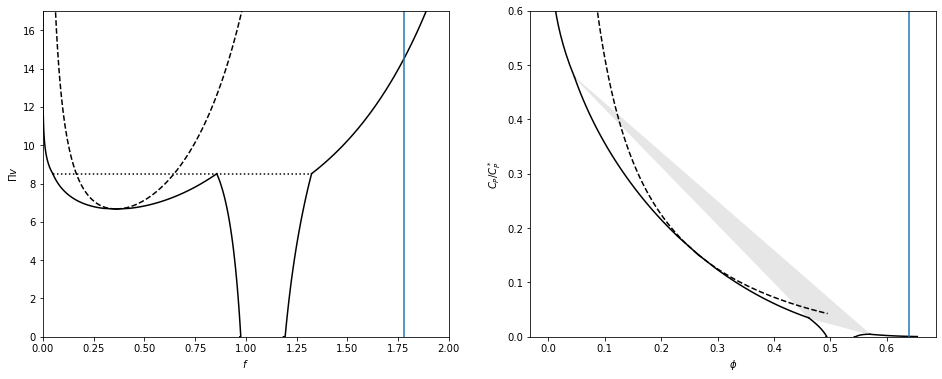

In [13]:
qR = 0.4
q = phase.qR2q(qR)
LS, GS, GL = phase.generate(q, fluid=phase.Liu())
sppiv = np.unique(np.concatenate((GS[:,0], GL[:,0])))
spinodal = phase.Liu().spinodalGL(q, sppiv)

fig, axs = subplots(1,2, figsize=(16,6))
#binodal lines
for f in GL.T[1:3]:
    axs[0].plot(f, GL[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GL[:,0], qR) * phase.alpha(f, q), color='k')
#spinodal lines
for f in spinodal.T[1:]:
    axs[0].plot(f, sppiv, 'k--')
    axs[1].plot(phase.f2vf(f), phase.piv2y(sppiv, qR) * phase.alpha(f, q), 'k--')
    
#liquid-solid coexistence lines
for f in LS.T[1:]:
    axs[0].plot(f, LS[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(LS[:,0], qR) * phase.alpha(f, q), color='k')
    
#gas-solid coexistence lines
for f in GS.T[1:]:
    axs[0].plot(f, GS[:,0], color='k')
    axs[1].plot(phase.f2vf(f), phase.piv2y(GS[:,0], qR) * phase.alpha(f, q), color='k')
    
#triple coexistence line
axs[0].plot(GS[0,1:3], [GS[0,0]]*2, ':k')
triple = Polygon([
    [phase.f2vf(GL[0,1]), phase.piv2y(GL[0,0], qR) * phase.alpha(GL[0,1], q)],
    [phase.f2vf(GL[0,2]), phase.piv2y(GL[0,0], qR) * phase.alpha(GL[0,2], q)],
    [phase.f2vf(GS[0,2]), phase.piv2y(GS[0,0], qR) * phase.alpha(GS[0,2], q)],
], color=[0.9]*3)
axs[1].add_patch(triple)

axs[0].set_xlim(0,2)
axs[0].set_ylim(0,GS[-1,0])
axs[0].axvline(phase.vf2f(0.64))
axs[0].set_xlabel(r'$f$')
axs[0].set_ylabel(r'$\Pi v$')
axs[1].set_ylim(0,0.6)
axs[1].axvline(0.64)
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$C_P/C_P^*$')